In [7]:
from rocketpy import Function, LiquidMotor, MassFlowRateBasedTank, Fluid

In [8]:
LiquidN2O = Fluid(name="Liquid Nitrous Oxide", density=855, quality=1)
VapourN2O = Fluid(name="Vapour Nitrous Oxide", density=101, quality=0)

N2O_tank = MassFlowRateBasedTank(
    name="Oxidizer Tank",
    diameter=0.2,
    height=1.6,
    bottomCap="flat",
    upperCap="flat",
    initial_liquid_mass=42.45,
    initial_gas_mass=0.95,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out="../../data/motors/liquid_motor_example/liquid_mass_flow_out.csv",
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out="../../data/motors/liquid_motor_example/gas_mass_flow_out.csv",
    liquid=LiquidN2O,
    gas=VapourN2O,
)

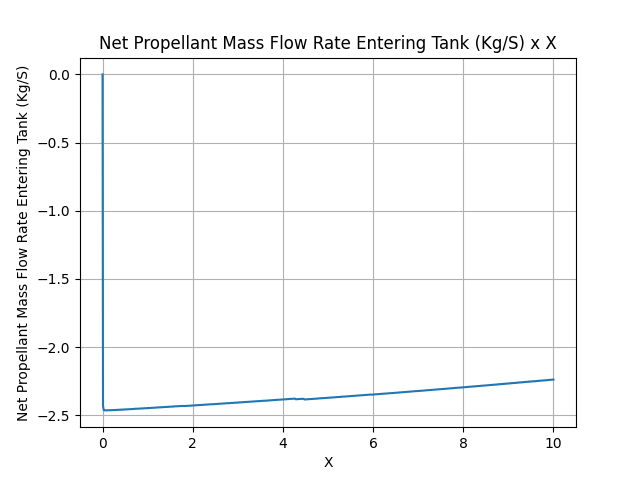

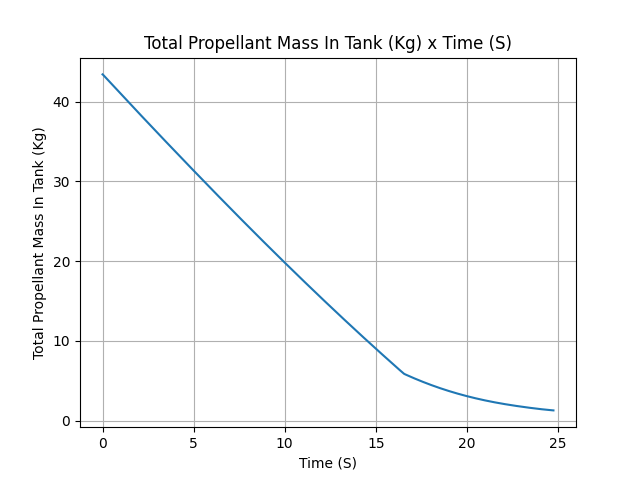

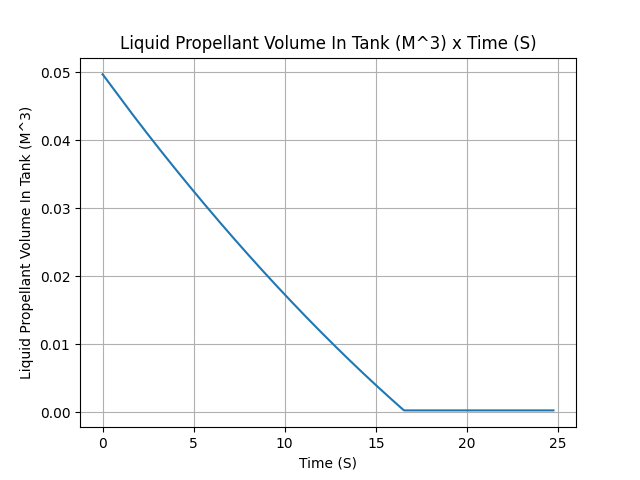

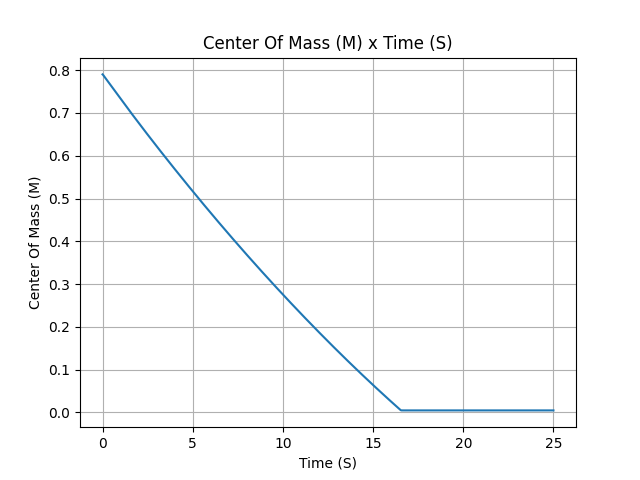

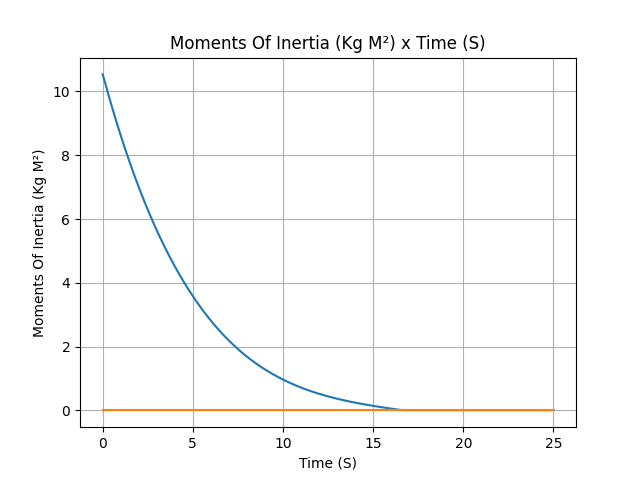

In [10]:
N2O_tank.netMassFlowRate()
N2O_tank.mass()
N2O_tank.liquidVolume()
Function(N2O_tank.centerOfMass, inputs="Time (s)", outputs="Center of Mass (m)").plot(
    0, 25
)
Function(
    N2O_tank.inertiaTensor, inputs="Time (s)", outputs="Moments of Inertia (kg m²)"
).plot(0, 25)

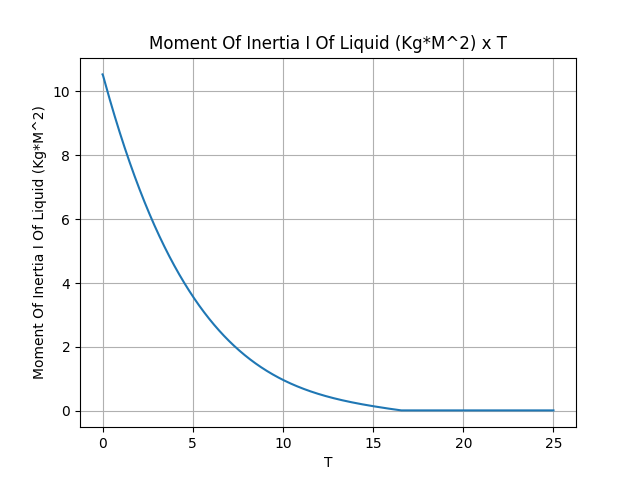

In [11]:
inertiaI = Function(lambda t: N2O_tank.inertiaTensor(t)[0])
inertiaZ = Function(lambda t: N2O_tank.inertiaTensor(t)[1])

inertiaI.setOutputs("Moment of Inertia I of Liquid (kg*m^2)")
inertiaI.plot(0, 25)